## Built-in color palettes in PIASO

PIASO provides a diverse selection of discrete color palettes and continous color plattes.

To use the built-in colors in PIASO, you can set the ` palette=piaso.pl.color.d_color1 ` for the discrete colors, and ` cmap=piaso.pl.color.c_color1 ` for the continuous colors in sc.pl.umap, piaso.pl.plot_embeddings_split or other functions. This notebook aims to display the available choices in both discrete and continuous color maps.

In [1]:
path = '/home/vas744/Analysis/Python/Packages/PIASO'
import sys
sys.path.append(path)

In [2]:
import importlib
from scipy import sparse
import piaso
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import warnings
import piaso.plotting.color as color

In [3]:
sc.set_figure_params(dpi=80,dpi_save=300, color_map='viridis',facecolor='white')
from matplotlib import rcParams
rcParams['figure.figsize'] = 4, 4
save_dir='/data1/vallaris/Results/single-cell/Methods/PIASO'
sc.settings.figdir = save_dir
prefix='GitHub_testing'

In [4]:
warnings.simplefilter(action='ignore', category=FutureWarning)

### Load the data

The 20k subsampled snRNA-seq data from Allen SEA-AD project is available in google drive: https://drive.google.com/file/d/1nH-CRaTQFxJ5pAVpy8_hUQn1nrIcakq2/view?usp=drive_link.

The original data is available in https://portal.brain-map.org/explore/seattle-alzheimers-disease.

In [5]:
adata=sc.read('/n/scratch/users/v/vas744/Data/Public/PIASO/SEA-AD_RNA_MTG_subsample_excludeReference_20k_piaso.h5ad')

In [6]:
adata

AnnData object with n_obs × n_vars = 20000 × 36601
    obs: 'sample_id', 'Neurotypical reference', 'Donor ID', 'Organism', 'Brain Region', 'Sex', 'Gender', 'Age at Death', 'Race (choice=White)', 'Race (choice=Black/ African American)', 'Race (choice=Asian)', 'Race (choice=American Indian/ Alaska Native)', 'Race (choice=Native Hawaiian or Pacific Islander)', 'Race (choice=Unknown or unreported)', 'Race (choice=Other)', 'specify other race', 'Hispanic/Latino', 'Highest level of education', 'Years of education', 'PMI', 'Fresh Brain Weight', 'Brain pH', 'Overall AD neuropathological Change', 'Thal', 'Braak', 'CERAD score', 'Overall CAA Score', 'Highest Lewy Body Disease', 'Total Microinfarcts (not observed grossly)', 'Total microinfarcts in screening sections', 'Atherosclerosis', 'Arteriolosclerosis', 'LATE', 'Cognitive Status', 'Last CASI Score', 'Interval from last CASI in months', 'Last MMSE Score', 'Interval from last MMSE in months', 'Last MOCA Score', 'Interval from last MOCA in mont

### Discrete color palettes

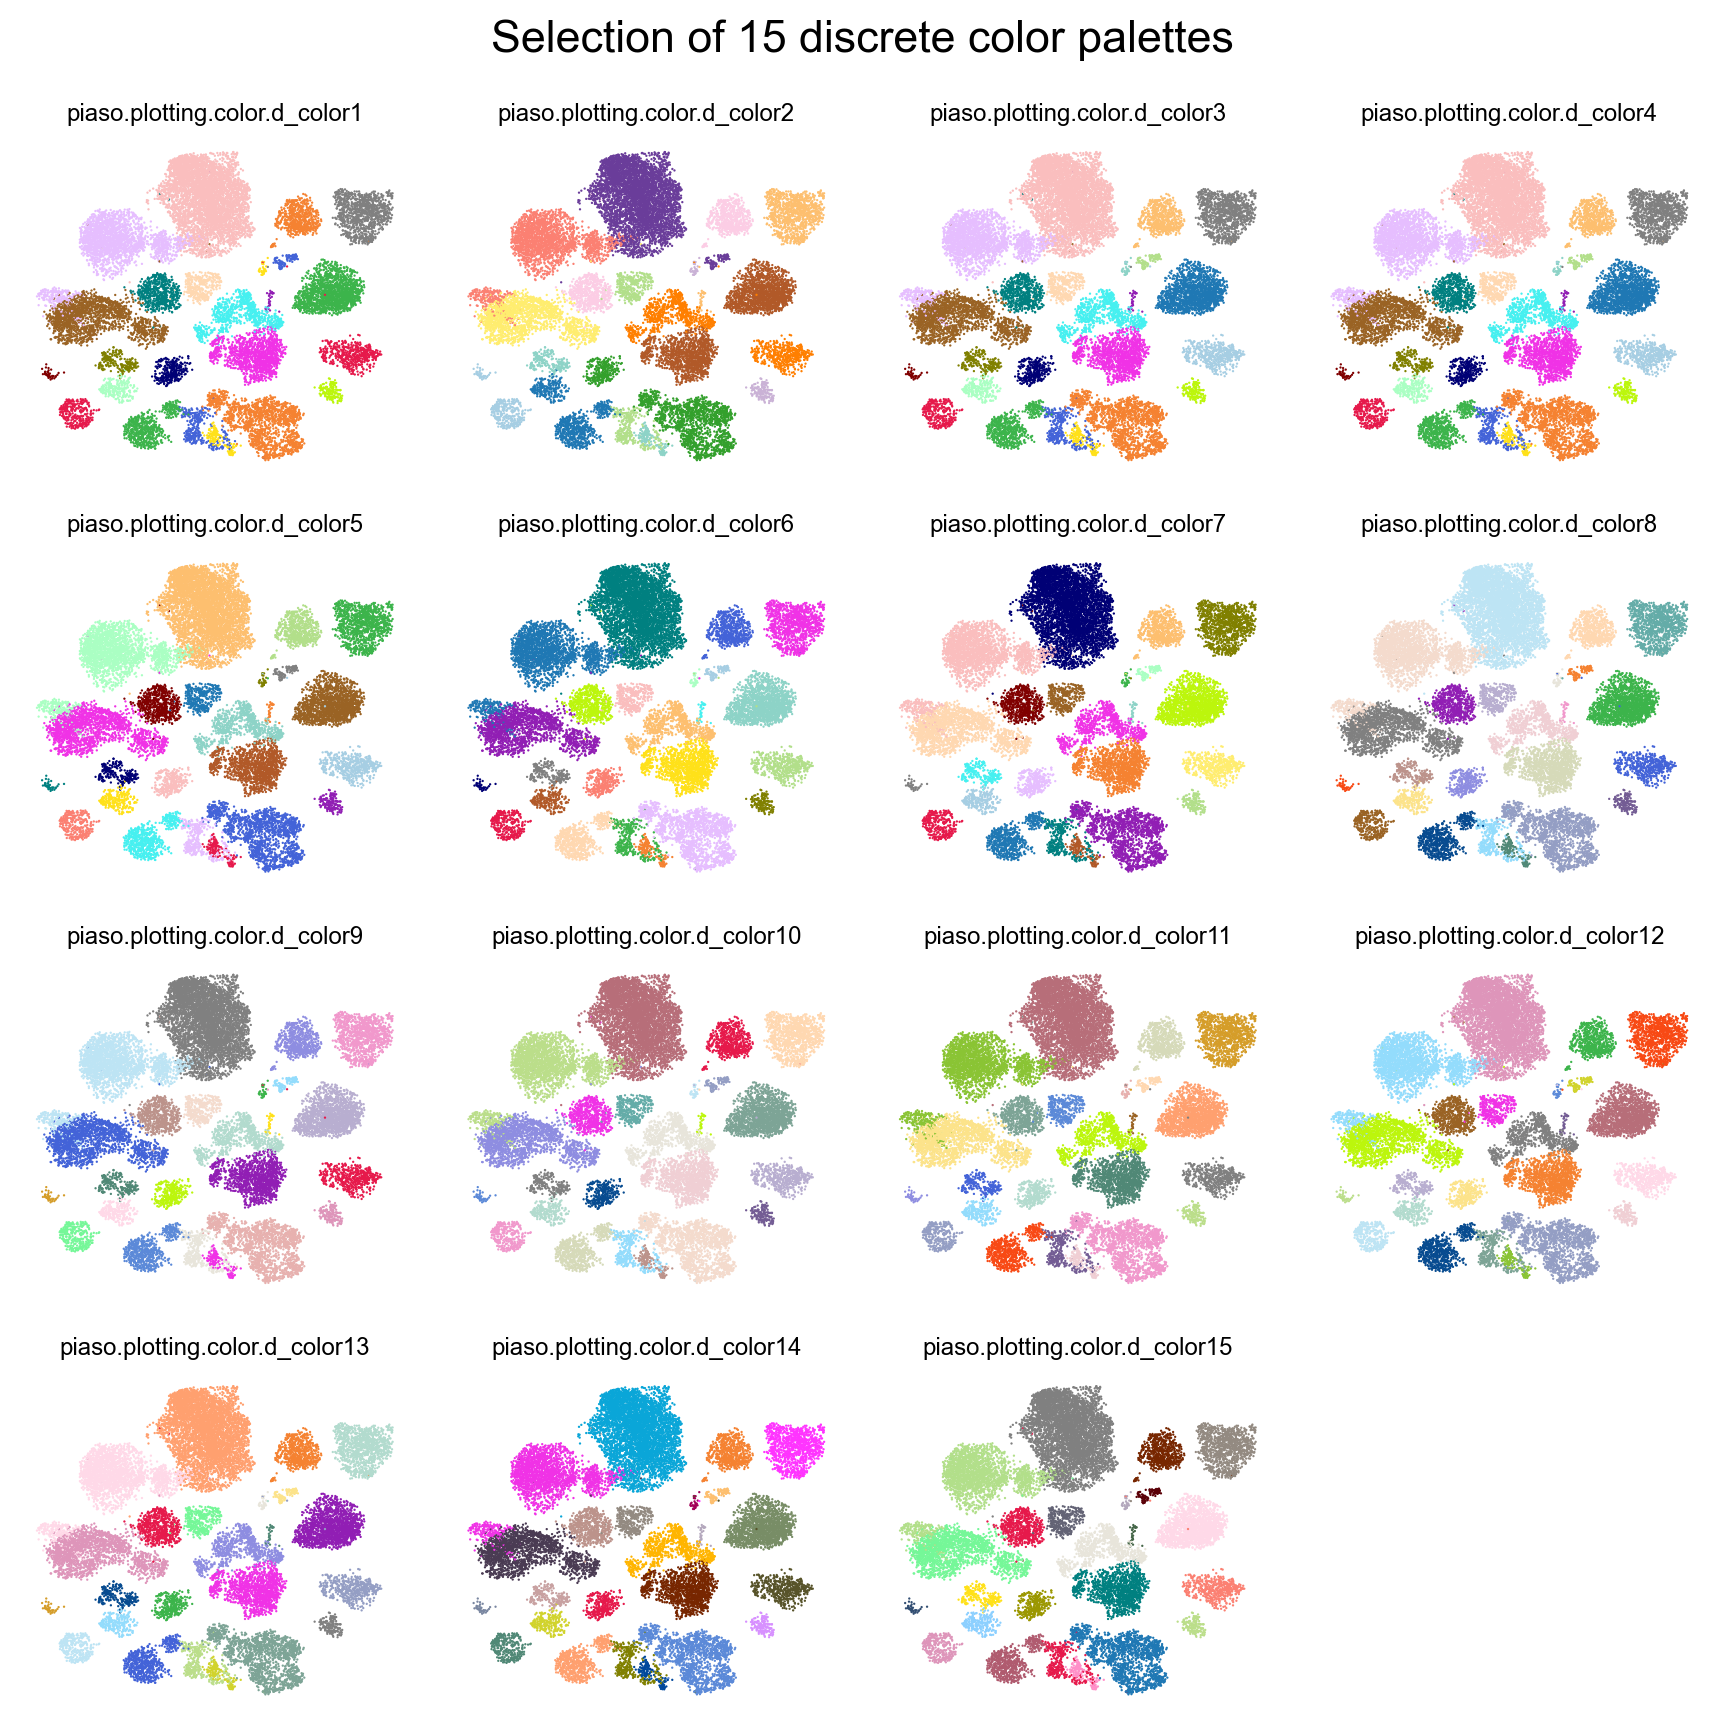

In [7]:
palettes = [c for c in vars(color) if c.startswith('d_')]
n = len(palettes)
ncol = 4
nrow = None
row_size, col_size = 2.3, 2.3
if ncol is None:
        nrow = int(np.sqrt(n))
        ncol = int(np.ceil(n / nrow))
else:
    nrow = int(np.ceil(n / ncol))

fig, axs = plt.subplots(nrow, ncol, dpi=96, figsize=(ncol * col_size, nrow * row_size))

c = 0
for i in range(len(axs)):
    for j in range(len(axs[0])):
        if c < n:
            palette_value = getattr(color, palettes[c], None)
            
            sc.pl.embedding(adata,
                            basis='X_umap',
                            color=['Subclass'],
                            palette=palette_value,
                            cmap='Spectral_r',
                            size=3,
                            frameon=False,
                            ax=axs[i][j],
                            title='piaso.plotting.color.'+str(palettes[c]),
                            legend_loc=None,
                            show=False)
            axs[i][j].title.set_size(9)
        else:
            axs[i][j].set_visible(False)
        c += 1
plt.suptitle("Selection of 15 discrete color palettes")
plt.tight_layout()
plt.show()

### Continuous color palettes

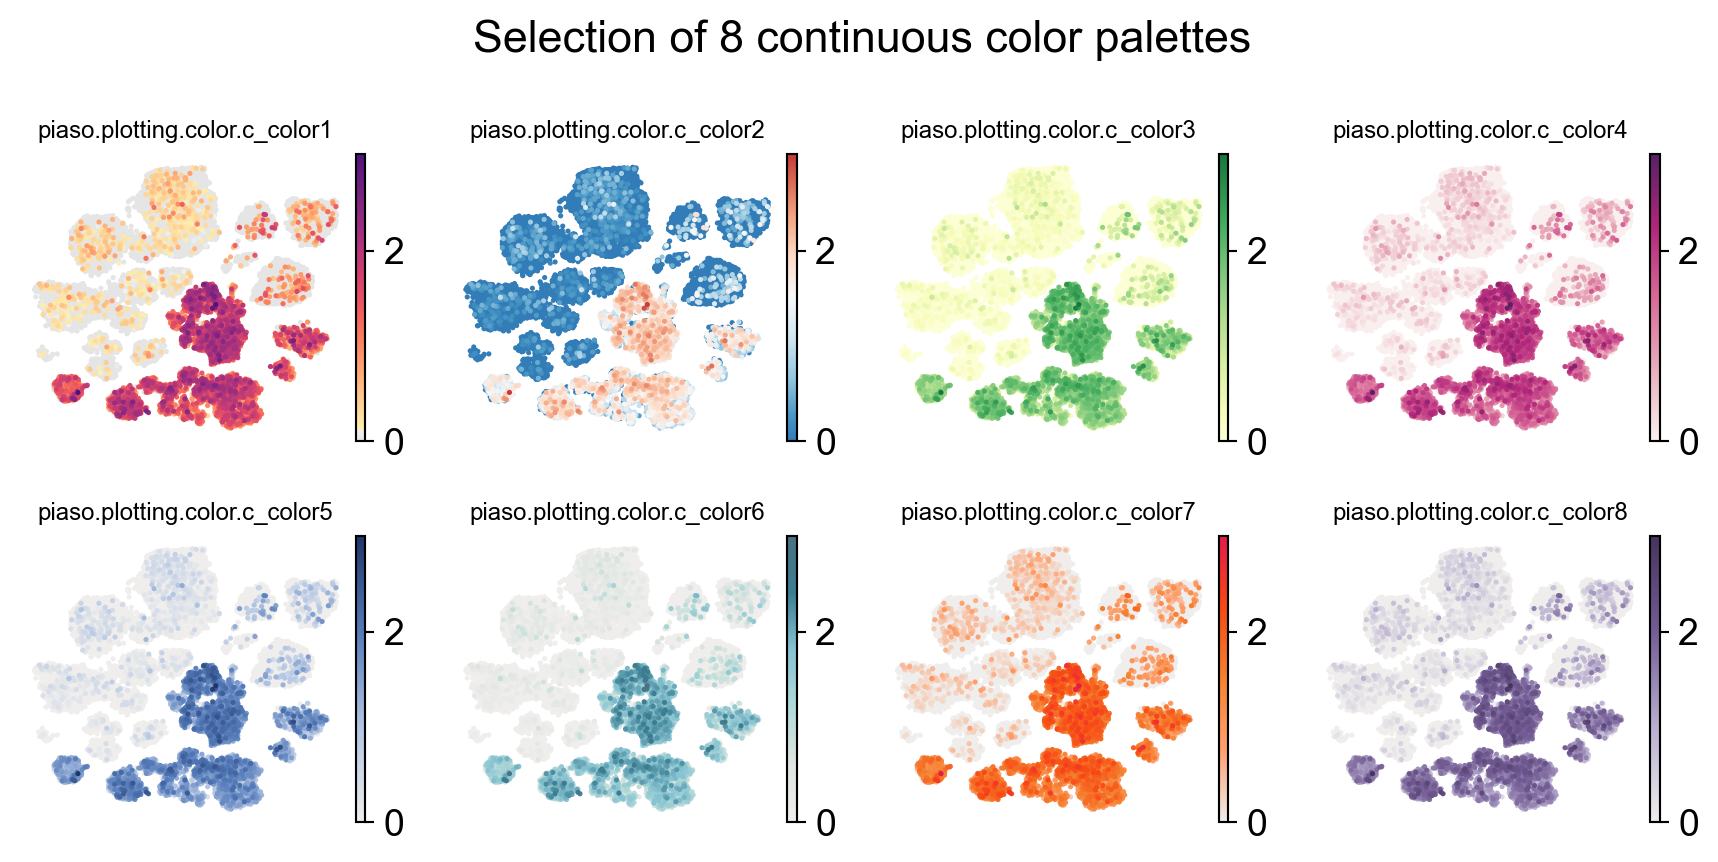

In [8]:
palettes = [c for c in vars(color) if c.startswith('c_')]
n = len(palettes)
ncol = None
nrow = None
row_size, col_size = 2.3, 2.3
if ncol is None:
        nrow = int(np.sqrt(n))
        ncol = int(np.ceil(n / nrow))
else:
    nrow = int(np.ceil(n / ncol))

fig, axs = plt.subplots(nrow, ncol, dpi=96, figsize=(ncol * col_size, nrow * row_size))

c = 0
for i in range(len(axs)):
    for j in range(len(axs[0])):
        if c < n:
            palette_value = getattr(color, palettes[c], None)

            sc.pl.umap(adata,
                       color=['GAD1'],
                       cmap=palette_value,
                       size=15,
                       frameon=False,
                       ax=axs[i][j],
                       title='piaso.plotting.color.'+str(palettes[c]),
                       legend_loc=None,
                       show=False)
            axs[i][j].title.set_size(9)
        else:
            axs[i][j].set_visible(False)
        c += 1
plt.suptitle("Selection of 8 continuous color palettes")
plt.tight_layout()
plt.show()